In [1]:
import json 
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Hyper parameters

In [72]:
vocab_size=1000 #try different values to get less loss
embedding_dim=32
max_length=32
trunc_type='post'
padding_type='post'
oov_tok="<oov>"
training_size=20000

## Reading Data

In [73]:
with open("sarcasm.json", 'r') as f:
    datastore = json.load(f)
    
sentences = [] 
labels = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

## Splitting Data

In [74]:
training_sentences=sentences[0:training_size]
testing_sentences=sentences[training_size:]
training_labels=labels[0:training_size]
testing_labels=labels[training_size:]

## Padding and Tokenizing

In [75]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index

training_sequence=tokenizer.texts_to_sequences(training_sentences)
training_padded=pad_sequences(training_sequence,maxlen=max_length,
                              padding=padding_type,
                              truncating=trunc_type)

testing_sequence=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequence,maxlen=max_length,
                              padding=padding_type,
                              truncating=trunc_type)

In [76]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

# Model

In [77]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(), #also can use Flatten for more accuracy but fear of overfit
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 32, 32)            32000     
_________________________________________________________________
global_average_pooling1d_7 ( (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 24)                792       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 25        
Total params: 32,817
Trainable params: 32,817
Non-trainable params: 0
_________________________________________________________________


In [78]:
num_epochs=30
history=model.fit(training_padded,training_labels,epochs=num_epochs,
                  validation_data=(testing_padded,testing_labels),
                  verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.5677 - accuracy: 0.6941 - val_loss: 0.4465 - val_accuracy: 0.7898
Epoch 2/30
625/625 - 2s - loss: 0.3964 - accuracy: 0.8227 - val_loss: 0.4049 - val_accuracy: 0.8113
Epoch 3/30
625/625 - 2s - loss: 0.3700 - accuracy: 0.8334 - val_loss: 0.4025 - val_accuracy: 0.8158
Epoch 4/30
625/625 - 2s - loss: 0.3617 - accuracy: 0.8369 - val_loss: 0.4055 - val_accuracy: 0.8152
Epoch 5/30
625/625 - 2s - loss: 0.3570 - accuracy: 0.8368 - val_loss: 0.4047 - val_accuracy: 0.8126
Epoch 6/30
625/625 - 2s - loss: 0.3549 - accuracy: 0.8385 - val_loss: 0.4078 - val_accuracy: 0.8122
Epoch 7/30
625/625 - 2s - loss: 0.3542 - accuracy: 0.8382 - val_loss: 0.4149 - val_accuracy: 0.8071
Epoch 8/30
625/625 - 2s - loss: 0.3526 - accuracy: 0.8395 - val_loss: 0.4086 - val_accuracy: 0.8135
Epoch 9/30
625/625 - 2s - loss: 0.3529 - accuracy: 0.8403 - val_loss: 0.4101 - val_accuracy: 0.8110
Epoch 10/30
625/625 - 2s - loss: 0.3514 - accuracy: 0.8378 - val_loss: 0.4099 - val_accuracy: 0.8141

## Ploting accuracy and loss

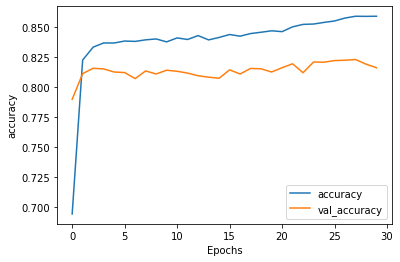

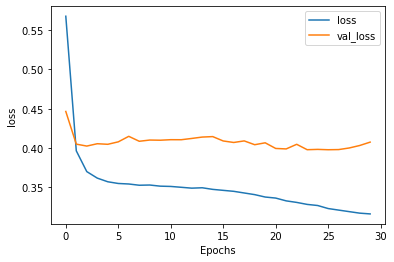

In [79]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")